<a href="https://colab.research.google.com/github/PhwTha00/buoi11_12_14/blob/main/buoi12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [22]:
url = "https://raw.githubusercontent.com/thieu1995/csv-files/main/data/timeseries/AirPassengers.csv"
data = pd.read_csv(url)
print(data)


       Month  #Passengers
0    1949-01          112
1    1949-02          118
2    1949-03          132
3    1949-04          129
4    1949-05          121
..       ...          ...
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432

[144 rows x 2 columns]


In [23]:
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)
ts = data['#Passengers']
print(ts)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64


In [24]:
train = ts[:int(0.8*len(ts))]
test = ts[int(0.8*len(ts)):]

In [25]:
best_aic = np.inf
best_order = None
best_model = None

for p in range(3):
    for d in range(3):
        for q in range(3):
            try:
                model = ARIMA(train, order=(p, d, q))
                results = model.fit()
                if results.aic < best_aic:
                    best_aic = results.aic
                    best_order = (p, d, q)
                    best_model = results
            except:
                continue
print("Best ARIMA order:", best_order)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

Best ARIMA order: (1, 2, 2)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [26]:
pred_arima = best_model.forecast(steps=len(test))
rmse_arima = np.sqrt(mean_squared_error(test, pred_arima))
print("RMSE of ARIMA model:", rmse_arima)

RMSE of ARIMA model: 129.61215699089698


In [27]:
# Xây dựng và tối ưu mô hình AR
rmse_ar = None
try:
    best_aic_ar = np.inf
    best_order_ar = None
    best_model_ar = None

    for p in range(3):
        model_ar = sm.tsa.AR(train)
        results_ar = model_ar.fit(maxlag=p)
        if results_ar.aic < best_aic_ar:
            best_aic_ar = results_ar.aic
            best_order_ar = p
            best_model_ar = results_ar
except:
    print("AR model couldn't be trained")

if best_model_ar is not None:
    print("Best AR order:", best_order_ar)
      # Dự đoán trên tập test và tính RMSE của AR
    pred_ar = best_model_ar.predict(start=len(train), end=len(train) + len(test) - 1)
    rmse_ar = np.sqrt(mean_squared_error(test, pred_ar))
    print("RMSE of AR model:", rmse_ar)
else:
    print("AR model couldn't be trained")
    rmse_ar = np.nan

AR model couldn't be trained
AR model couldn't be trained


In [28]:
# Xây dựng và tối ưu mô hình MA
rmse_ma = None
try:
    best_aic_ma = np.inf
    best_order_ma = None
    best_model_ma = None

    for q in range(3):
        model_ma = ARIMA(train, order=(0, 0, q))  # MA(q) model
        results_ma = model_ma.fit()
        if results_ma.aic < best_aic_ma:
            best_aic_ma = results_ma.aic
            best_order_ma = q
            best_model_ma = results_ma
except:
    print("MA model couldn't be trained")

if best_model_ma is not None:
    print("Best MA order:", best_order_ma)

    # Dự đoán trên tập test và tính RMSE của MA
    pred_ma = best_model_ma.predict(start=len(train), end=len(train) + len(test) - 1)
    rmse_ma = np.sqrt(mean_squared_error(test, pred_ma))
    print("RMSE of MA model:", rmse_ma)
else:
    print("MA model couldn't be trained")
    rmse_ma = np.nan


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

Best MA order: 2
RMSE of MA model: 207.24628156269097


In [29]:
# Xây dựng và tối ưu mô hình ARMA
rmse_arma = None
try:
    best_aic_arma = np.inf
    best_order_arma = None
    best_model_arma = None

    for p in range(3):
        for q in range(3):
            model_arma = ARIMA(train, order=(p, 0, q))  # ARMA(p,q) model
            results_arma = model_arma.fit()
            if results_arma.aic < best_aic_arma:
                best_aic_arma = results_arma.aic
                best_order_arma = (p, q)
                best_model_arma = results_arma
except:
    print("ARMA model couldn't be trained")

if best_model_arma is not None:
    print("Best ARMA order:", best_order_arma)

    # Dự đoán trên tập test và tính RMSE của ARMA
    pred_arma = best_model_arma.predict(start=len(train), end=len(train) + len(test) - 1)
    rmse_arma = np.sqrt(mean_squared_error(test, pred_arma))
    print("RMSE of ARMA model:", rmse_arma)
else:
    print("ARMA model couldn't be trained")
    rmse_arma = np.nan

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

Best ARMA order: (2, 1)
RMSE of ARMA model: 111.0705980126346


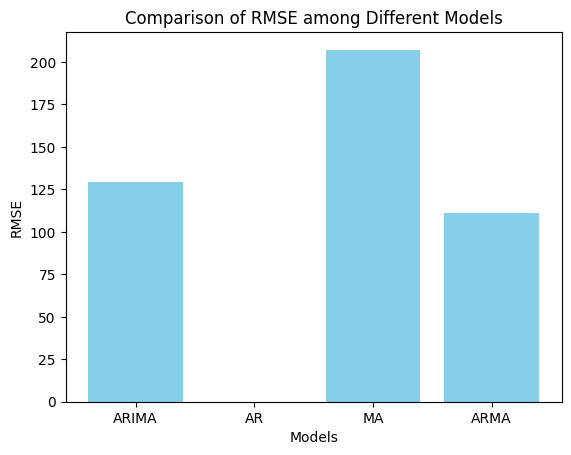

In [30]:
# Biểu đồ so sánh RMSE
models = ['ARIMA', 'AR', 'MA', 'ARMA']
rmse_values = [rmse_arima, rmse_ar, rmse_ma, rmse_arma]

plt.bar(models, rmse_values, color='skyblue')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Comparison of RMSE among Different Models')
plt.show()